In [2]:
#Loading and inspecting data

import pandas as pd

# Loading the dataset
file_path = "/Users/bharatheeshls/Downloads/sales_data.xlsx"
df = pd.read_excel(file_path)

# Displaying the first few rows
df.head()


,Transaction_ID,Date,Customer_ID,Product,Category,Quantity,Price,Total_Amount,Payment_Method,Region
0,1001,2024-01-05,C001,Laptop,Electronics,1,800,NaN,Credit Card,North
1,1002,2024-01-10,C002,Smartphone,Electronics,2,600,1200.0,Cash,South
2,1003,2024-01-12,C003,Headphones,Electronics,1,100,100.0,PayPal,West
3,1004,2024-02-05,C004,Tablet,Electronics,1,500,500.0,Debit Card,East
4,1005,2024-02-08,C005,Book,Books,3,20,60.0,Credit Card,North


In [3]:
#Data Cleaning

#Checking  and Handle Missing Values

# Checking for missing values
print(df.isnull().sum())

# Filling missing Total_Amount (if any) using Quantity * Price
df["Total_Amount"] = df["Quantity"] * df["Price"]

# Verifing if missing values are handled
print(df.isnull().sum())


Transaction_ID    0
Date              0
Customer_ID       0
Product           0
Category          0
Quantity          0
Price             0
Total_Amount      1
Payment_Method    0
Region            0
dtype: int64
Transaction_ID    0
Date              0
Customer_ID       0
Product           0
Category          0
Quantity          0
Price             0
Total_Amount      0
Payment_Method    0
Region            0
dtype: int64


In [4]:
#Removing Duplicates

# Checking for duplicates
print("Duplicate Rows:", df.duplicated().sum())

# Removing duplicate rows if found
df = df.drop_duplicates()


Duplicate Rows: 0


In [5]:
#Standardize Data Formats

# Ensuring Date is in correct format
df["Date"] = pd.to_datetime(df["Date"], format="%Y-%m-%d")

# Verifing data types
print(df.dtypes)


Transaction_ID             int64
Date              datetime64[ns]
Customer_ID               object
Product                   object
Category                  object
Quantity                   int64
Price                      int64
Total_Amount               int64
Payment_Method            object
Region                    object
dtype: object


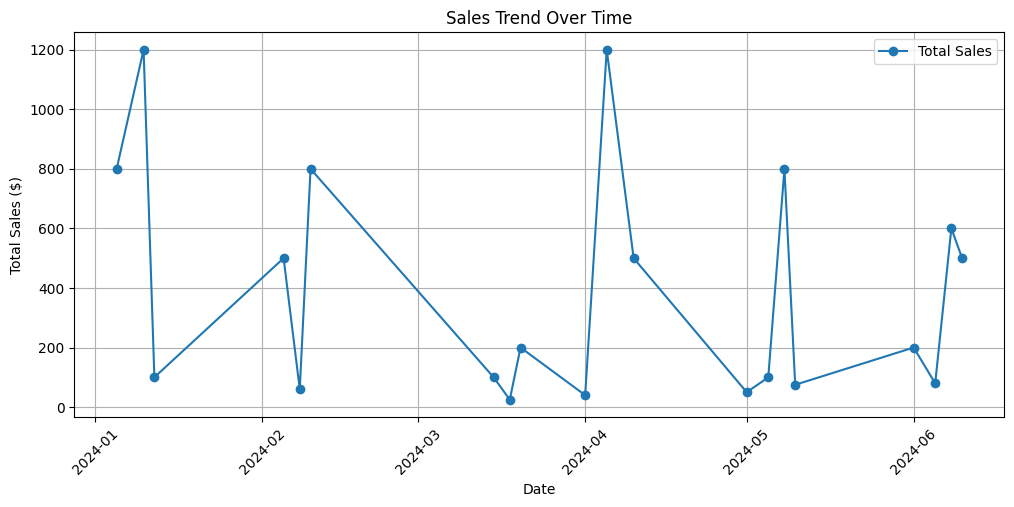

In [6]:
#Exploratory Data Analysis (EDA)

#Sales Trend Over Time

import matplotlib.pyplot as plt

# Aggregating sales by date
sales_trend = df.groupby("Date")["Total_Amount"].sum()

# Ploting sales trend
plt.figure(figsize=(12, 5))
plt.plot(sales_trend.index, sales_trend.values, marker='o', linestyle='-', label="Total Sales")
plt.xlabel("Date")
plt.ylabel("Total Sales ($)")
plt.title("Sales Trend Over Time")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()


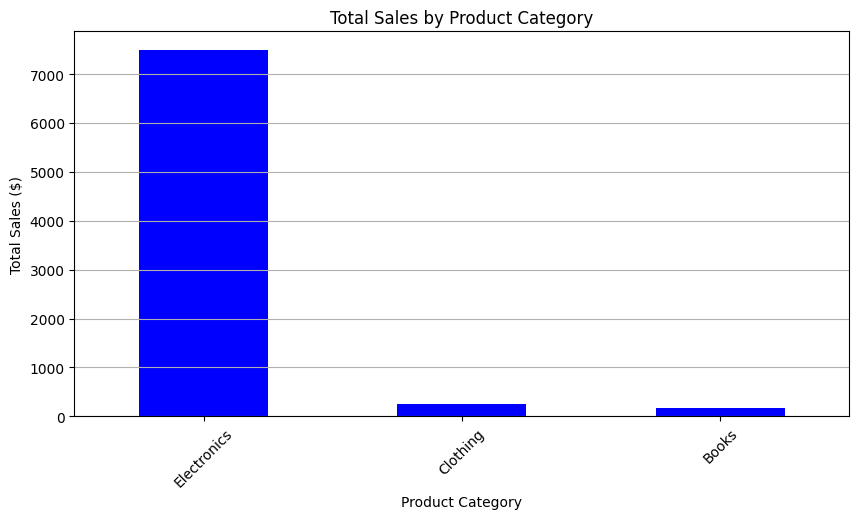

In [8]:
#Top-Selling Product Categories

# Aggregating total sales by product category
category_sales = df.groupby("Category")["Total_Amount"].sum().sort_values(ascending=False)

# Ploting sales by product category
plt.figure(figsize=(10, 5))
category_sales.plot(kind="bar", color="blue")
plt.xlabel("Product Category")
plt.ylabel("Total Sales ($)")
plt.title("Total Sales by Product Category")
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.show()


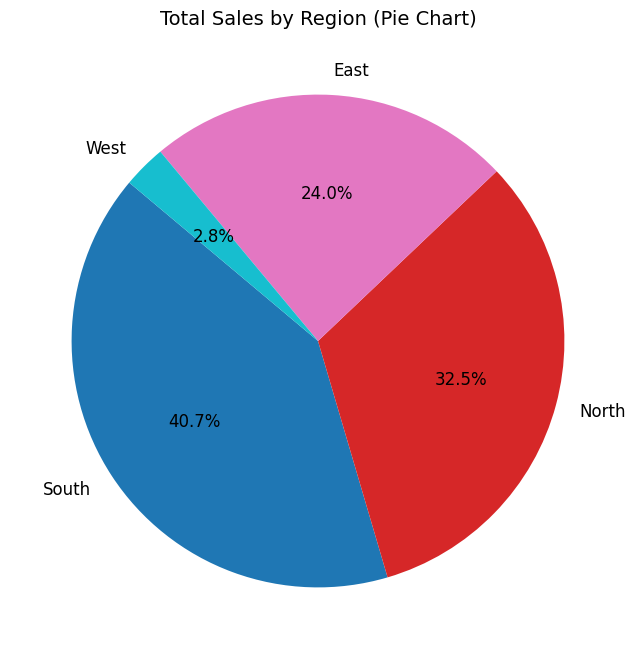

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Loading the dataset
df = pd.read_excel(file_path)

# Ensuring Total_Amount is correctly calculated
df["Total_Amount"] = df["Quantity"] * df["Price"]

# Aggregating total sales by region
region_sales = df.groupby("Region")["Total_Amount"].sum().sort_values(ascending=False)

# Ploting sales by region as a pie chart
plt.figure(figsize=(8, 8))
region_sales.plot(kind="pie", autopct="%1.1f%%", startangle=140, cmap="tab10", fontsize=12)
plt.ylabel("") 
# Removing y-axis label for better visualization
plt.title("Total Sales by Region (Pie Chart)", fontsize=14)
plt.show()


In [14]:
#Generating Insights & Recommendations

#Identifing Low-Performing Months

# Extract month from Date
df["Month"] = df["Date"].dt.month

# Aggregate sales by month
monthly_sales = df.groupby("Month")["Total_Amount"].sum().sort_values()

# Display lowest-performing months
print("Lowest Performing Months:\n", monthly_sales.head(2))


Lowest Performing Months:
 Month
3     325
5    1025
Name: Total_Amount, dtype: int64


In [ ]:
#Saving Cleaned Data for Report

df.to_csv("/Users/bharatheeshls/Downloads/cleaned_sales_data.csv", index=False)
print("Cleaned data saved successfully!")


Cleaned data saved successfully!


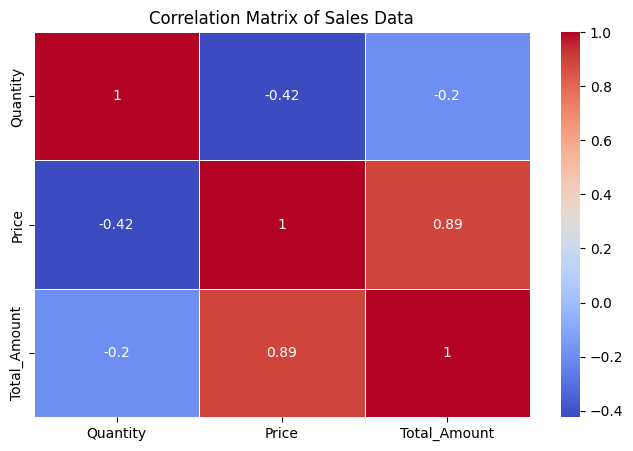

In [ ]:
#Exploratory Data Analysis

#Generating a Correlation Matrix

import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
correlation_matrix = df[["Quantity", "Price", "Total_Amount"]].corr()

# Plot the heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix of Sales Data")
plt.show()


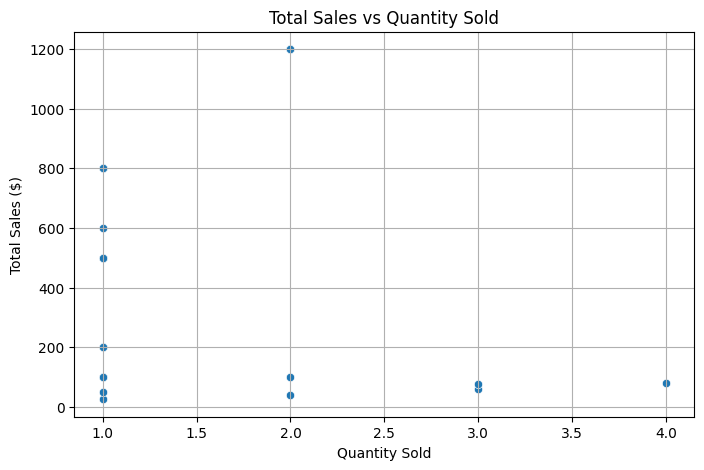

In [ ]:
#Generating a Scatter Plot

# Scatter plot for Total_Amount vs Quantity
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["Quantity"], y=df["Total_Amount"])
plt.xlabel("Quantity Sold")
plt.ylabel("Total Sales ($)")
plt.title("Total Sales vs Quantity Sold")
plt.grid(True)
plt.show()
